In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from pandas_datareader.data import DataReader
from datetime import datetime
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [2]:
tech_list = ['INUV', 'BIOL']
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

In [3]:
for stock in tech_list:
        globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [4]:
company_list = [INUV, BIOL]
company_name = ['INUVO', 'BIOLASE']
for company, com_name in zip(company_list, company_name):
    company['company_name'] = com_name
df = pd.concat(company_list, axis=0)
df.sample(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2012-04-20,14.263637,12.721622,13.829945,13.155314,29011.0,13.155314,BIOLASE
2018-11-07,1.420000,1.200000,1.360000,1.250000,1405400.0,1.250000,INUVO
2012-03-30,13.444441,13.058938,13.396253,13.058938,16871.0,13.058938,BIOLASE
2017-05-25,1.200000,1.130000,1.150000,1.200000,93300.0,1.200000,INUVO
2014-12-26,14.000000,13.300000,13.350000,13.800000,19720.0,13.800000,BIOLASE
2011-05-31,2.590000,2.410000,2.570000,2.580000,600.0,2.580000,INUVO
2011-08-04,15.840163,14.430060,15.840163,14.477063,103865.0,14.477063,BIOLASE
2019-03-25,2.400000,2.290000,2.300000,2.400000,27600.0,2.400000,BIOLASE
2019-10-03,0.290000,0.270000,0.290000,0.280000,33700.0,0.280000,INUVO


In [5]:
INUV.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000
mean,1.251899,1.159285,1.207227,1.201552,5.302593e+05,1.201552
std,0.751541,0.705122,0.731103,0.723764,2.321429e+06,0.723764
min,0.180000,0.090000,0.180000,0.170000,0.000000e+00,0.170000
25%,0.750000,0.680000,0.710000,0.710000,2.750000e+04,0.710000
50%,1.100000,1.010000,1.050000,1.050000,6.550000e+04,1.050000
75%,1.530000,1.410000,1.470000,1.460000,1.749000e+05,1.460000
max,4.490000,3.980000,4.490000,4.110000,6.876590e+07,4.110000


In [6]:
BIOL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000
mean,8.185479,7.644951,7.914783,7.897138,9.209463e+05,7.897138
std,6.704048,6.282295,6.508199,6.491420,9.845738e+06,6.491420
min,0.250000,0.210000,0.230000,0.230000,3.800000e+02,0.230000
25%,2.150000,1.970000,2.050000,2.050000,1.420000e+04,2.050000
50%,7.650000,7.200000,7.400000,7.400000,3.220000e+04,7.400000
75%,12.081857,11.500000,11.800000,11.800000,7.900900e+04,11.800000
max,32.204346,30.249746,31.878578,31.785501,3.655552e+08,31.785501


In [7]:
INUV.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2011-01-14 to 2021-01-14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          2517 non-null   float64
 1   Low           2517 non-null   float64
 2   Open          2517 non-null   float64
 3   Close         2517 non-null   float64
 4   Volume        2517 non-null   int64  
 5   Adj Close     2517 non-null   float64
 6   company_name  2517 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 157.3+ KB


In [8]:
BIOL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2011-01-14 to 2021-01-14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          2517 non-null   float64
 1   Low           2517 non-null   float64
 2   Open          2517 non-null   float64
 3   Close         2517 non-null   float64
 4   Volume        2517 non-null   float64
 5   Adj Close     2517 non-null   float64
 6   company_name  2517 non-null   object 
dtypes: float64(6), object(1)
memory usage: 157.3+ KB


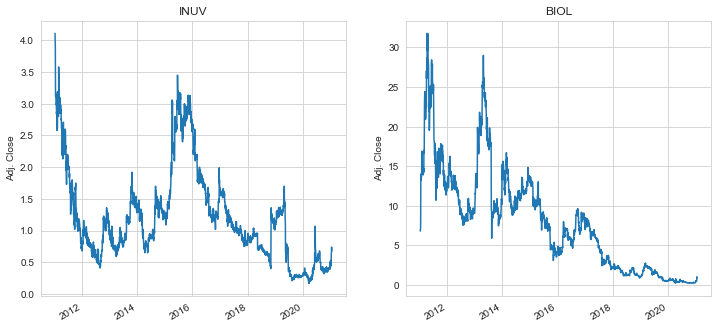

In [9]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj. Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i-1]}")

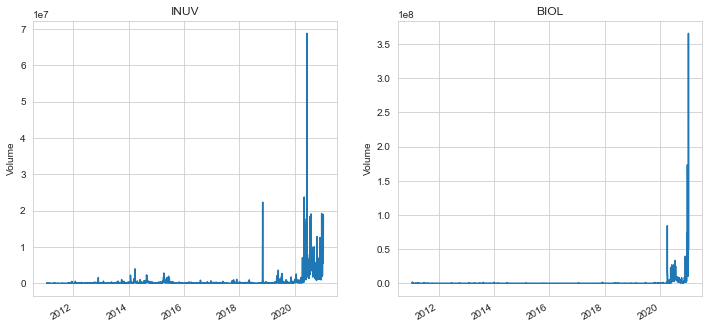

In [10]:
# Total volume for each stock being traded per day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i-1]}")

In [11]:
#Moving average
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [12]:
print(INUV.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


In [13]:
print(BIOL.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


company_name
BIOLASE    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
INUVO      [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

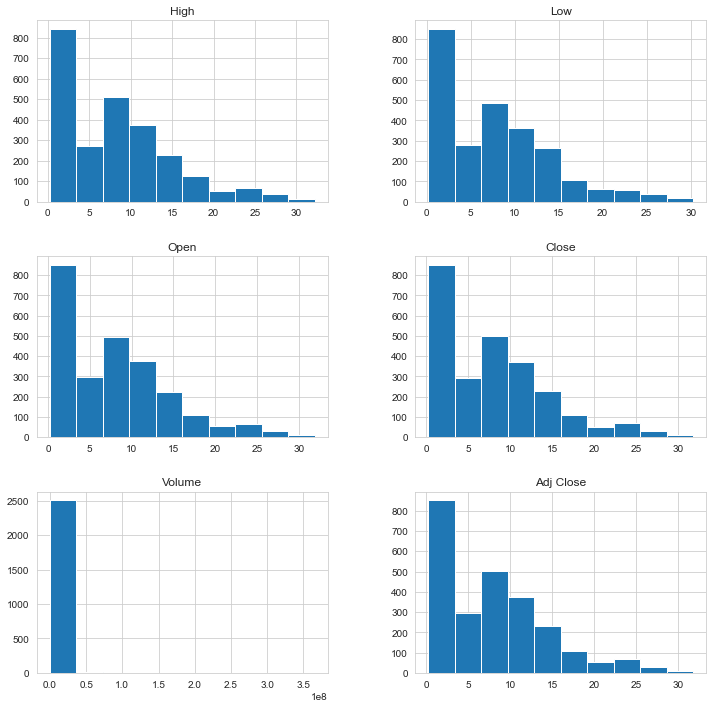

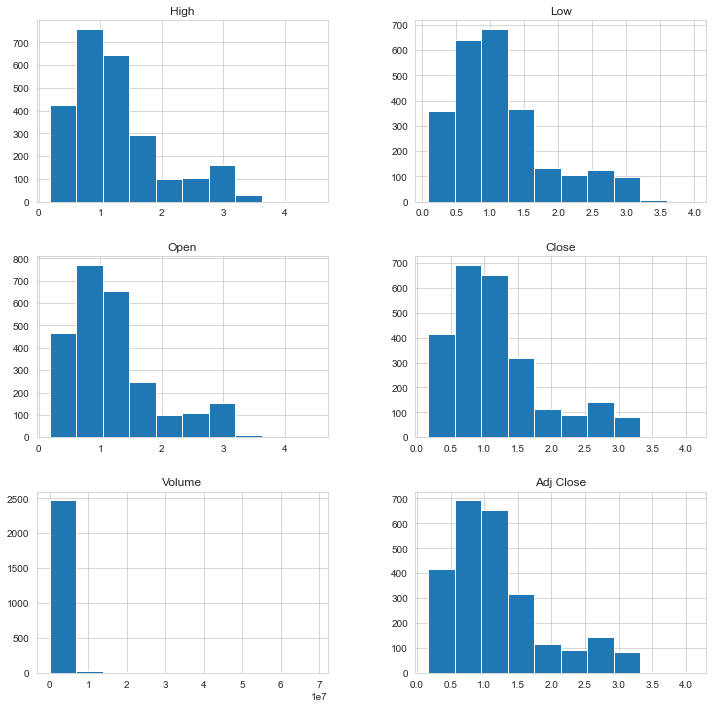

In [14]:
df.groupby("company_name").hist(figsize=(12, 12))


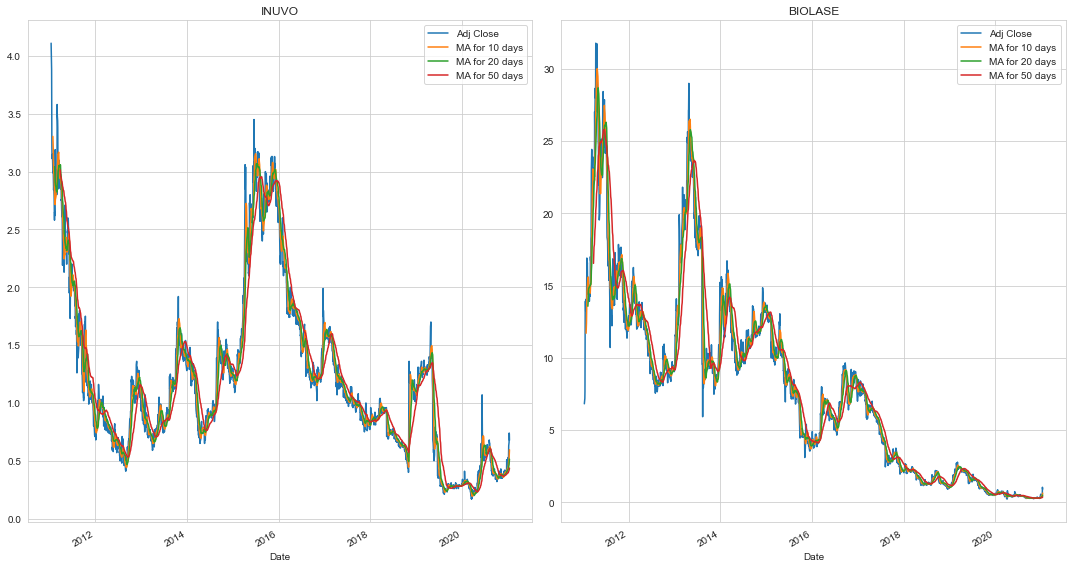

In [15]:
fig, axes = plt.subplots(ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
INUV[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0])
axes[0].set_title('INUVO')
BIOL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1])
axes[1].set_title('BIOLASE')
fig.tight_layout()

In [16]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

Text(0.5, 1.0, 'BIOLASE')

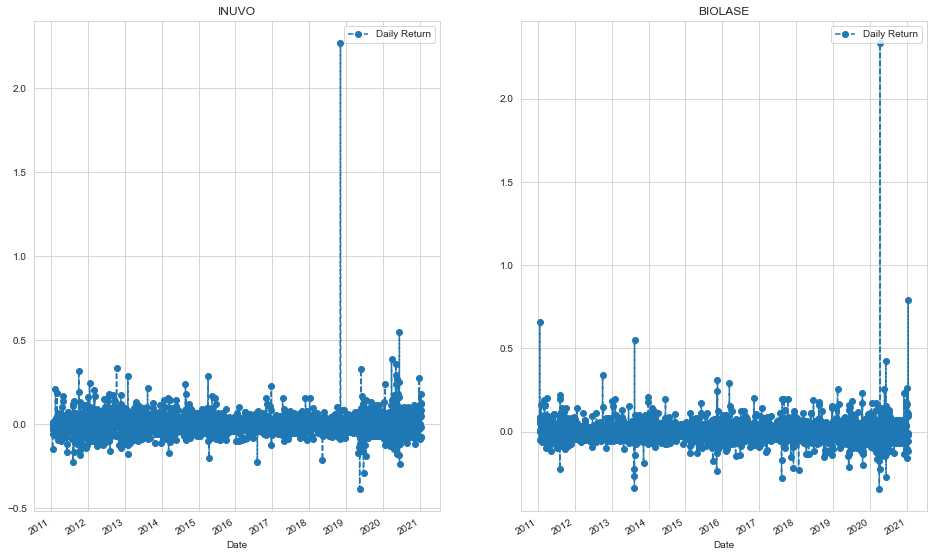

In [17]:
fig, axes = plt.subplots(ncols=2)
fig.set_figheight(10)
fig.set_figwidth(16)
INUV['Daily Return'].plot(ax=axes[0], legend=True, linestyle='--', marker='o')
axes[0].set_title('INUVO')
BIOL['Daily Return'].plot(ax=axes[1], legend=True, linestyle='--', marker='o')
axes[1].set_title('BIOLASE')

In [18]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head()

Symbols,INUV,BIOL
Date,,
2011-01-14,4.11,6.819440
2011-01-18,3.88,7.188058
2011-01-19,3.31,7.694909
2011-01-20,3.22,12.763411
2011-01-21,3.12,13.915344


In [19]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,INUV,BIOL
Date,,
2011-01-14,NaN,NaN
2011-01-18,-0.055961,0.054054
2011-01-19,-0.146907,0.070513
2011-01-20,-0.027190,0.658682
2011-01-21,-0.031056,0.090253


C:\Users\rxbro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


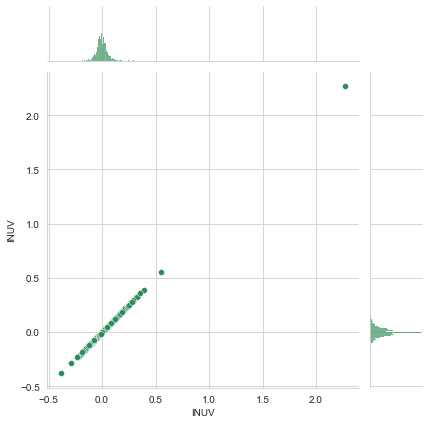

In [20]:
sns.jointplot('INUV', 'INUV', tech_rets, kind='scatter', color='seagreen')

C:\Users\rxbro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


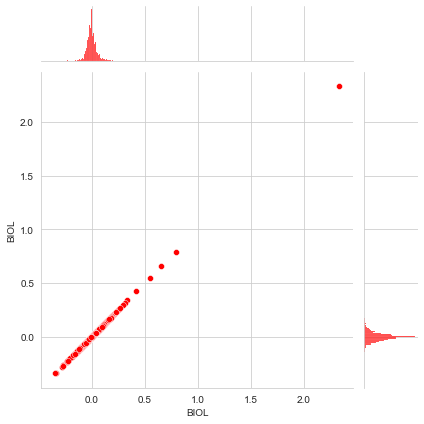

In [21]:
sns.jointplot('BIOL', 'BIOL', tech_rets, kind='scatter', color='red')

C:\Users\rxbro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


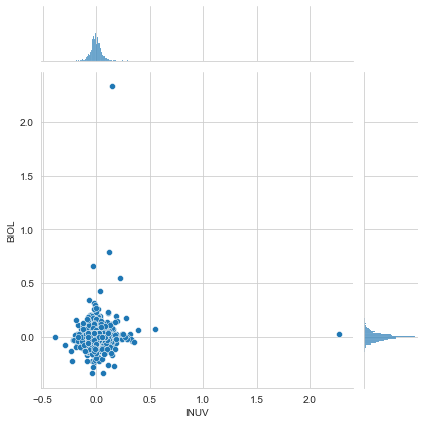

In [22]:
sns.jointplot('INUV', 'BIOL', tech_rets, kind='scatter')

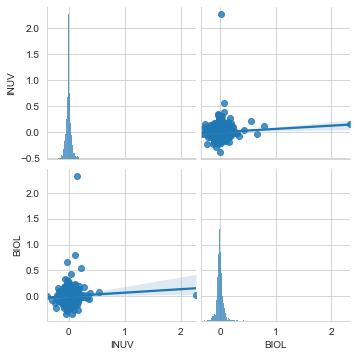

In [23]:
sns.pairplot(tech_rets, kind='reg')

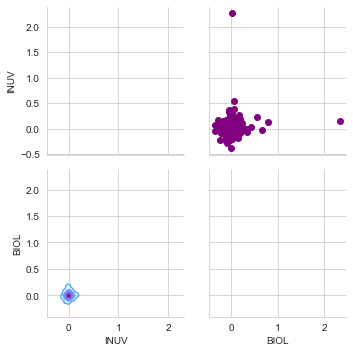

In [24]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
#return_fig.map_diagonal(plt.hist, nbins=?)

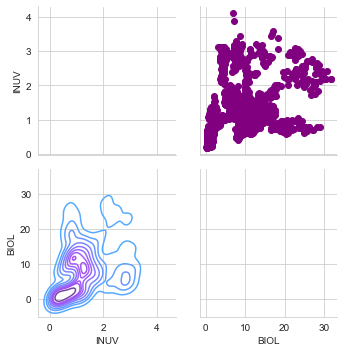

In [25]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

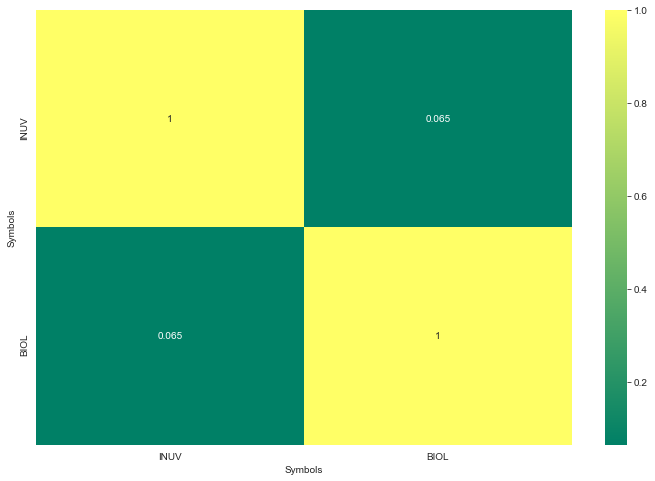

In [26]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

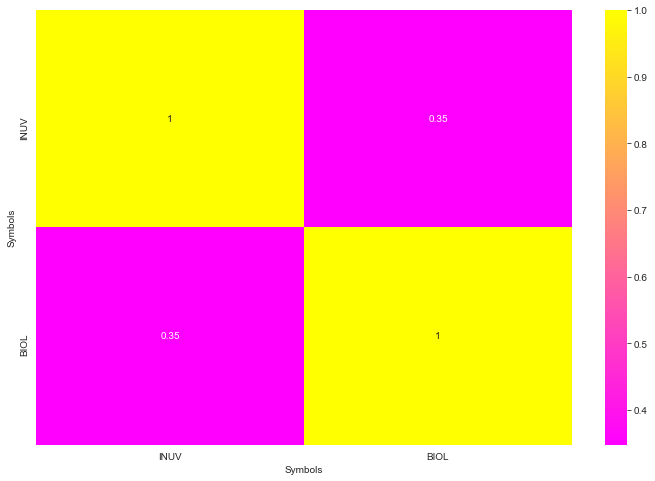

In [27]:
sns.heatmap(closing_df.corr(), annot=True, cmap='spring')

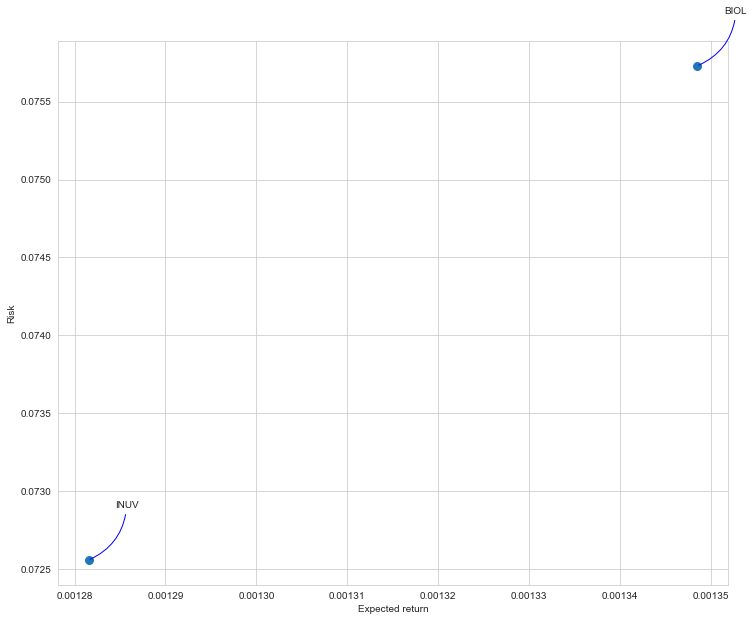

In [28]:
rets = tech_rets.dropna()
area = np.pi * 20
plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', arrowprops = dict(arrowstyle='-', color='blue', connectionstyle='arc3, rad=-0.3'))